In [7]:
from graphviz import Digraph
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [8]:
SupplyChain = Digraph(format="png")

SupplyChain.attr("node", shape="circle", style="filled")

In [9]:
items = []
items.append({"name": "iron", "color": "gray80"})
items.append({"name": "gear", "color": "gray80"})

items.append({"name": "copper", "color": "coral"})

items.append({"name": "pack1", "color": "red"})

for item in items:
    SupplyChain.node(item["name"], color=item["color"])

In [10]:
with SupplyChain.subgraph(name="layer1") as l1:
    l1.body.append("{rank=min; iron; copper;}")

with SupplyChain.subgraph(name="layer2") as l2:
    l2.body.append("{rank=same; gear;}")

with SupplyChain.subgraph(name="layer3") as l3:
    l3.body.append("{rank=max; pack1;}")

In [11]:
edges = []
edges.append({"to": "gear", "from": "iron", "label": "2"})
edges.append({"to": "pack1", "from": "gear", "label": "1"})
edges.append({"to": "pack1", "from": "copper", "label": "1"})

for edge in edges:
    SupplyChain.edge(edge["from"], edge["to"], label=edge["label"])

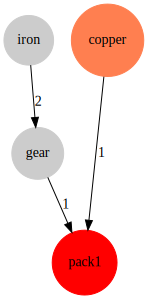

In [12]:
SupplyChain

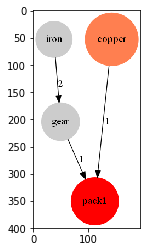

In [13]:
SupplyChain.render("supply_chain")

img = Image.open("supply_chain.png")
img_array = np.asarray(img)

plt.imshow(img_array)

plt.show()